generate points

--- System 1 Coordinates (on XY plane) ---
[[-10.     0.     0.  ]
 [ -9.4    3.42   0.  ]
 [ -7.66   6.43   0.  ]
 [ -5.     8.66   0.  ]
 [ -1.74   9.85   0.  ]
 [  1.74   9.85   0.  ]
 [  5.     8.66   0.  ]
 [  7.66   6.43   0.  ]
 [  9.4    3.42   0.  ]
 [ 10.     0.     0.  ]]

--- System 2 Coordinates (on X=5 plane) ---
[[  5.   -10.    10.  ]
 [  5.    -9.4   13.42]
 [  5.    -7.66  16.43]
 [  5.    -5.    18.66]
 [  5.    -1.74  19.85]
 [  5.     1.74  19.85]
 [  5.     5.    18.66]
 [  5.     7.66  16.43]
 [  5.     9.4   13.42]
 [  5.    10.    10.  ]]


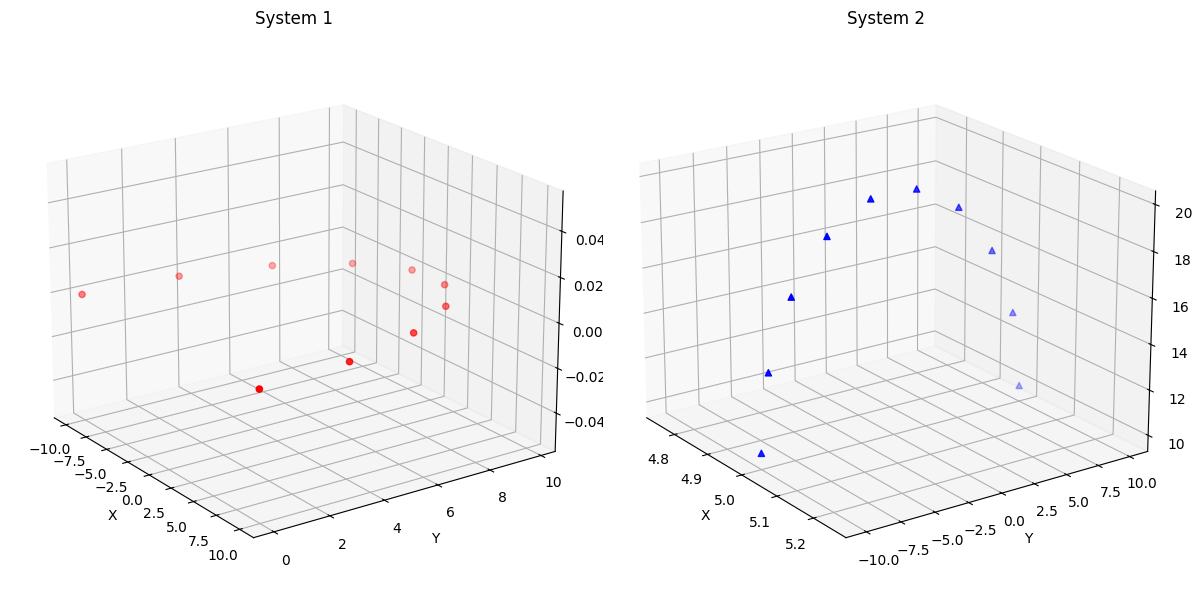

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
NUM_POINTS = 10
RADIUS = 10.0

# --- System 1: Semi-circle on the XY-plane (z=0) ---
center1 = np.array([0, 0, 0])
angles = np.linspace(np.pi, 0, NUM_POINTS) # 180 to 0 degrees

points1 = np.zeros((NUM_POINTS, 3))
points1[:, 0] = center1[0] + RADIUS * np.cos(angles)  # X
points1[:, 1] = center1[1] + RADIUS * np.sin(angles)  # Y 
points1[:, 2] = center1[2]                            # Z=0


# --- System 2: Semi-circle on a plane parallel to YZ (x=5) ---
center2 = np.array([5, 0, 10])

points2 = np.zeros((NUM_POINTS, 3))
points2[:, 0] = center2[0]                            # X 
points2[:, 1] = center2[1] + RADIUS * np.cos(angles)  # Y 
points2[:, 2] = center2[2] + RADIUS * np.sin(angles)  # Z 


# --- Print Coordinates ---
print("--- System 1 Coordinates (on XY plane) ---")
print(np.round(points1, 2))
print("\n--- System 2 Coordinates (on X=5 plane) ---")
print(np.round(points2, 2))


# --- Visualization ---
fig = plt.figure(figsize=(12, 6))

# Subplot for System 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(points1[:, 0], points1[:, 1], points1[:, 2], c='r', marker='o')
ax1.set_title('System 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.view_init(elev=20., azim=-35) # Set viewing angle

# Subplot for System 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(points2[:, 0], points2[:, 1], points2[:, 2], c='b', marker='^')
ax2.set_title('System 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=20., azim=-35) # Set viewing angle

plt.tight_layout()
plt.show()

fingerprinting and pairing

In [3]:
from itertools import combinations

# --- Step 2: Prepare Data for Matching ---

# Create labels for the points
labels1 = [f'P{i+1}' for i in range(NUM_POINTS)]
labels2 = [f"P'{i+1}" for i in range(NUM_POINTS)]

# Create dictionaries for easy lookup of points by their labels
point_map1 = {label: point for label, point in zip(labels1, points1)}
point_map2 = {label: point for label, point in zip(labels2, points2)}


# --- Step 3: Logic for Robust Fingerprinting and Matching ---

def get_robust_fingerprints(labels, point_map):
    """
    Calculates a robust fingerprint for each point based on the perimeters of
    triangles formed with its neighbors. This signature is invariant to
    rotation and reflection.
    """
    fingerprints = {}
    
    for ref_label in labels:
        ref_point = point_map[ref_label]
        neighbor_labels = [l for l in labels if l != ref_label]
        
        perimeters = []
        # Create all unique pairs of neighbors to form triangles
        for n1_label, n2_label in combinations(neighbor_labels, 2):
            p1 = point_map[n1_label]
            p2 = point_map[n2_label]
            
            # np.linalg.norm calculates Euclidean distance in N-dimensions
            d1 = np.linalg.norm(ref_point - p1)
            d2 = np.linalg.norm(ref_point - p2)
            d3 = np.linalg.norm(p1 - p2)
            
            perimeters.append(d1 + d2 + d3)
        
        # The final signature is the sorted list of perimeters
        fingerprints[ref_label] = sorted(perimeters)
        
    return fingerprints


def find_correspondences(fingerprints1, fingerprints2):
    """Compares the robust fingerprints to find matching pairs."""
    
    print("\n## Finding Point Correspondences...")
    print("-" * 35)
    
    pairs = []
    unmatched2 = list(fingerprints2.keys())

    for label1, sig1 in fingerprints1.items():
        match_found = False
        for label2 in unmatched2:
            sig2 = fingerprints2[label2]
            
            # The check is a simple and robust comparison of the two perimeter lists
            if np.allclose(sig1, sig2):
                print(f"✅ Match Found: {label1} corresponds to {label2}")
                pairs.append((label1, label2))
                unmatched2.remove(label2)
                match_found = True
                break
        
        if not match_found:
            print(f"❌ No match found for {label1}")

    return pairs


# --- Step 4: Run the Pairing Algorithm ---

# Calculate the robust fingerprints for each system
fingerprints1 = get_robust_fingerprints(labels1, point_map1)
fingerprints2 = get_robust_fingerprints(labels2, point_map2)

# Find and print the correspondences
found_pairs = find_correspondences(fingerprints1, fingerprints2)

print("-" * 35)
print("\n## Final Paired Sets:")
print(found_pairs)


## Finding Point Correspondences...
-----------------------------------
✅ Match Found: P1 corresponds to P'1
✅ Match Found: P2 corresponds to P'2
✅ Match Found: P3 corresponds to P'3
✅ Match Found: P4 corresponds to P'4
✅ Match Found: P5 corresponds to P'5
✅ Match Found: P6 corresponds to P'6
✅ Match Found: P7 corresponds to P'7
✅ Match Found: P8 corresponds to P'8
✅ Match Found: P9 corresponds to P'9
✅ Match Found: P10 corresponds to P'10
-----------------------------------

## Final Paired Sets:
[('P1', "P'1"), ('P2', "P'2"), ('P3', "P'3"), ('P4', "P'4"), ('P5', "P'5"), ('P6', "P'6"), ('P7', "P'7"), ('P8', "P'8"), ('P9', "P'9"), ('P10', "P'10")]
